# Неделя 2. Среда 

## Математический анализ

In [30]:
# Имортируй библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np
import seaborn as sns

### Анализ

❓Что значит, что производная в точке равна нулю? 

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = {3x^6}$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -\dfrac{9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \frac{4}{\sqrt{x}} + 7\cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \frac{x\cos{x} - \sin{x}}{5x^2}$

7. $y = \dfrac{\cot{x} + 2}{3x}$

$y' = \frac{-x\csc^2{x} - \cot{x} - 2}{3x^2}$

8. $y = (3-7x)^9$

$y' = -63(3 - 7x)^{8}$

9. Найдите производную в точке $t = 3$:

$y(t) = t^6 - 4t^3$

$1350$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [31]:
def loss(w):
    loss = w**2 + 3

    return loss

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [32]:
def derivative(w):
    deriv = 2*w

    return deriv

3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [33]:
def step(w, _lambda):
    '''
    input:
        _lambda - learning rate

    returns:
        coord - w_coord
        loss_value  - y_coord
    '''

    coord = w - _lambda * derivative(w)
    loss_value = loss(coord)

    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [34]:
def get_minima(w_0, eps, _lambda):
    """Находит минимум функции потерь с помощью градиентного спуска

    Аргументы:
        w_0: начальное значение параметра
        eps: точность (критерий останова)
        _lambda: коэффициент скорости обучения

    Возвращает:
        w: финальное значение параметра
        w_history: список всех промежуточных значений параметра
        loss_values: список значений функции потерь на каждом шаге
    """
    w = w_0
    w_history = [w]
    loss_values = [loss(w)]

    while True:
        w_new, loss_value = step(w, _lambda)
        w_history.append(w_new)
        loss_values.append(loss_value)

        # Проверяем критерий останова: если изменение значения функции потерь меньше eps
        if abs(loss_value - loss_values[-2]) < eps:
            break

        w = w_new

    return w, w_history, loss_values

Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

Найденный минимум: w = 0.01416710, L(w) = 3.00020071
Количество итераций: 25


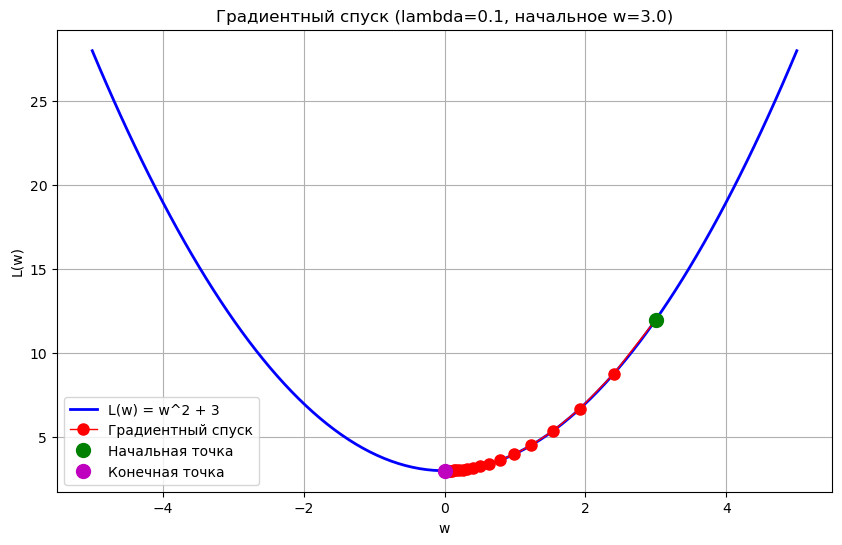

In [35]:
# Визуализация функции loss и процесса градиентного спуска
w_0 = 3.0  # Начальное значение параметра
eps = 0.0001  # Критерий останова
_lambda = 0.1  # Коэффициент скорости обучения

# Запускаем градиентный спуск
final_w, w_history, loss_values = get_minima(w_0, eps, _lambda)

# Создаем точки для построения графика функции loss
w_range = np.linspace(-5, 5, 100)
loss_range = [loss(w) for w in w_range]

# Настройка размера графика
plt.figure(figsize=(10, 6))

# Построение графика функции loss
plt.plot(w_range, loss_range, 'b-', linewidth=2, label='L(w) = w^2 + 3')

# Отмечаем точки, которые прошел градиентный спуск
plt.plot(w_history, loss_values, 'ro-', markersize=8, linewidth=1, label='Градиентный спуск')

# Выделяем начальную точку
plt.plot(w_history[0], loss_values[0], 'go', markersize=10, label='Начальная точка')

# Выделяем конечную точку
plt.plot(w_history[-1], loss_values[-1], 'mo', markersize=10, label='Конечная точка')

# Настраиваем график
plt.title(f'Градиентный спуск (lambda={_lambda}, начальное w={w_0})')
plt.xlabel('w')
plt.ylabel('L(w)')
plt.grid(True)
plt.legend()

# Выводим результаты
print(f"Найденный минимум: w = {final_w:.8f}, L(w) = {loss(final_w):.8f}")
print(f"Количество итераций: {len(w_history) - 1}")

plt.show()

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

Найденный минимум: w = 0.00491520, L(w) = 3.00002416
Количество итераций: 8


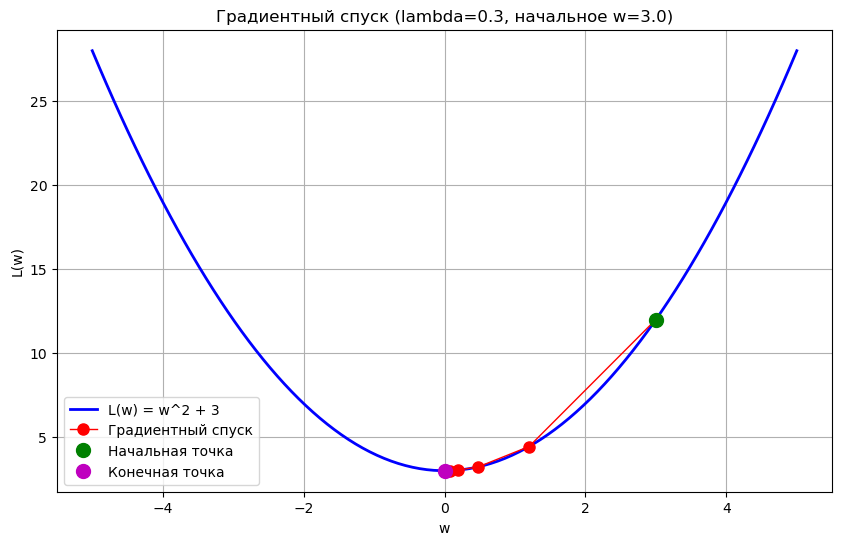

In [36]:
# Визуализация функции loss и процесса градиентного спуска
w_0 = 3.0  # Начальное значение параметра
eps = 0.0001  # Критерий останова
_lambda = 0.3  # Коэффициент скорости обучения

# Запускаем градиентный спуск
final_w, w_history, loss_values = get_minima(w_0, eps, _lambda)

# Создаем точки для построения графика функции loss
w_range = np.linspace(-5, 5, 100)
loss_range = [loss(w) for w in w_range]

# Настройка размера графика
plt.figure(figsize=(10, 6))

# Построение графика функции loss
plt.plot(w_range, loss_range, 'b-', linewidth=2, label='L(w) = w^2 + 3')

# Отмечаем точки, которые прошел градиентный спуск
plt.plot(w_history, loss_values, 'ro-', markersize=8, linewidth=1, label='Градиентный спуск')

# Выделяем начальную точку
plt.plot(w_history[0], loss_values[0], 'go', markersize=10, label='Начальная точка')

# Выделяем конечную точку
plt.plot(w_history[-1], loss_values[-1], 'mo', markersize=10, label='Конечная точка')

# Настраиваем график
plt.title(f'Градиентный спуск (lambda={_lambda}, начальное w={w_0})')
plt.xlabel('w')
plt.ylabel('L(w)')
plt.grid(True)
plt.legend()

# Выводим результаты
print(f"Найденный минимум: w = {final_w:.8f}, L(w) = {loss(final_w):.8f}")
print(f"Количество итераций: {len(w_history) - 1}")

plt.show()

❓ Как выбрать оптимальную скорость обучения?

> _ответ тут_

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> ответ тут

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

In [37]:
def loss(w):
    loss = w ** 2 - w
    return loss

def derivative(w):
    deriv = 2 * w -1
    return deriv


#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [38]:
def loss2(w):
    loss = w[0] ** 2 + 2 * w[1] ** 2 - 3 * w[0] - 4 * w[1]
    return loss

In [39]:
def derivative2(w):
    deriv = np.array([2 * w[0] - 3, 4 * w[1] - 4])
    return deriv

In [40]:
def step(w, _lambda):
    '''
    input:
        alpha - learning rate

    returns:
        coord - [w1_coords, w2_coords]
        loss_value - y_coord
    '''
    coord = w - _lambda * derivative2(w)
    loss_value = loss2(coord)
    return coord, loss_value

2. С помощью градиентного _спуска_ можно найти и __максимум__ функции, для этого нужно внести небольшое изменение в формулу обновления весов. Попробуйте сделать это и визуализировать результат: 
$$L(w_1, w_2) = \dfrac{1}{1+w_1^2} + \dfrac{1}{1+w_2^2}$$  


__P.S__: для данной функции, максимальное значение достигается в точке $(0; 0)$. Это необходимо для самопроверки

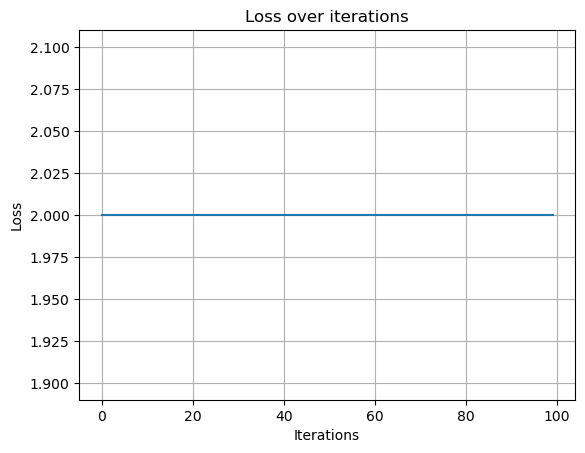

In [41]:
def loss_max(w):
    return 1 / (1 + w[0] ** 2) + 1 / (1 + w[1] ** 2)

def derivative_max(w):
    return np.array([-2 * w[0] / (1 + w[0] ** 2) ** 2, -2 * w[1] / (1 + w[1] ** 2) ** 2])

def step_max(w, _lambda):
    coord = w + _lambda * derivative_max(w)  # Изменение знака для максимизации
    loss_value = loss_max(coord)
    return coord, loss_value

# Инициализация переменных
w = np.array([0.0, 0.0])  # Начальная точка
learning_rate = 0.1
n_iterations = 100
loss_values = []

# Градиентный спуск
for i in range(n_iterations):
    w, loss_value = step_max(w, learning_rate)
    loss_values.append(loss_value)

# Визуализация результата
plt.plot(loss_values)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()


3. С помощью градиентного спуска найти минимум функции и визуализировать результат. Незабывайте, код у вас уже реализован в предыдущих заданиях, примените его.  
$$L(w1, w2) = (5 \cdot \omega_1)^2 + \omega_2^2$$

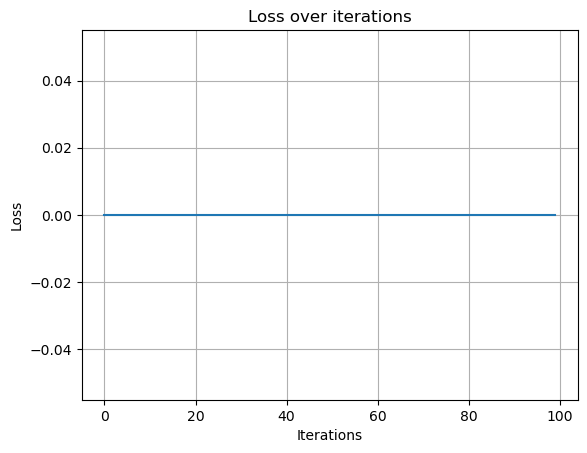

In [42]:
def loss_min(w):
    return (5 * w[0]) ** 2 + w[1] ** 2

def derivative_min(w):
    return np.array([10 * w[0], 2 * w[1]])

def step_min(w, _lambda):
    coord = w - _lambda * derivative_min(w)  # Изменение знака для минимизации
    loss_value = loss_min(coord)
    return coord, loss_value

# Инициализация переменных
w = np.array([0.0, 0.0])  # Начальная точка
learning_rate = 0.1
n_iterations = 100
loss_values = []

# Градиентный спуск
for i in range(n_iterations):
    w, loss_value = step_min(w, learning_rate)
    loss_values.append(loss_value)

# Визуализация результата
plt.plot(loss_values)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()


<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks stage 2"`
4. Выполни команду `git push`

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [43]:
X = np.array([
    [2, 3, -1],
    [1, -2, 1],
    [1, 0, 2]
])

y = np.array([9, 3, 2])

In [44]:
# code

In [45]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

NameError: name 'Solver' is not defined

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [8]:
class Optimizer():
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`